# Assignment 04
## In this assignment we will review Naive Bayes and Logistic regression modeling.
    
__Please submit a python script and markdown using Jupyter notebook (.ipynb file). File name should be "Lastname_Firstname_assignment04.ipynb". Provide step-by-step code for partial credits and do not forget to run your code before submitting.__

* Please do not share works publicly on GitHub or other places until the deadline.
* Some part of coding can be identical if you work with classmates but annotation/comment must be individual work.
* If you have any concerns or struggles, do not hesitate to contact me (b.hong@columbia.edu). 

In [1]:
# Load modules here
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
import sklearn.metrics as metrics 

# 1. Naive Bayes Classifier problem
    
Assume you have a data set as below. It contains records of cars with three features: 
* The type of the car (sports(1) or SUV(2))
* The color of the car (red(1) or yellow(2))
* The origin of the car (domestic(1) or imported(2))

And the labels for the data are: stolen(1) and not(0).

In [2]:
y=[1,0,1,0,1,0,1,0,0,1]
X=[[1,1,1,2,2,2,2,2,1,1],[1,1,1,1,1,2,2,2,2,1],[1,1,1,1,2,2,2,1,2,2]]
data=[y]+X
data=pd.DataFrame(data).T
data.columns=['Stolen','Color','Type','Origin']
data

,Stolen,Color,Type,Origin
0,1,1,1,1
1,0,1,1,1
2,1,1,1,1
3,0,2,1,1
4,1,2,1,2
5,0,2,2,2
6,1,2,2,2
7,0,2,2,1
8,0,1,2,2
9,1,1,1,2


### (1) Calculate the following sample probabilities: 
* P(Red|Stolen)
* P(SUV|Stolen)
* P(Domestic|Stolen)
* P(Red|Not Stolen)
* P(SUV|Not Stolen)
* P(Domestic|Not Stolen)

\begin{align}
\ P(Red|Stolen) = \frac{P(x_{Red}|c_{Stolen})\cdot P(c_{Stolen})}{P(x_{Red})} = \frac{\frac{3}{5} \cdot \frac{1}{2}}{\frac{1}{2}} = \frac{3}{5}\\
\end{align}

\begin{align}
\ P(SUV|Stolen) = \frac{P(x_{SUV}|c_{Stolen})\cdot P(c_{Stolen})}{P(x_{SUV})} = \frac{\frac{1}{4} \cdot \frac{1}{2}}{\frac{2}{5}} = \frac{5}{16}\\
\end{align}

\begin{align}
\ P(Domestic|Stolen) = \frac{P(x_{Domestic}|c_{Stolen})\cdot P(c_{Stolen})}{P(x_{Domestic})} = \frac{\frac{2}{5} \cdot \frac{1}{2}}{\frac{1}{2}} = \frac{2}{5}\\
\end{align}

\begin{align}
\ P(Red|Not Stolen) = \frac{P(x_{Red}|c_{Not Stolen})\cdot P(c_{Not Stolen})}{P(x_{Red})} = \frac{\frac{2}{5} \cdot \frac{1}{2}}{\frac{1}{2}} = \frac{2}{5}\\
\end{align}

\begin{align}
\ P(SUV|Not Stolen) = \frac{P(x_{SUV}|c_{Not Stolen})\cdot P(c_{Not Stolen})}{P(x_{SUV})} = \frac{\frac{3}{4} \cdot \frac{1}{2}}{\frac{2}{5}} = \frac{15}{16}\\
\end{align}

\begin{align}
\ P(Domestic|Not Stolen) = \frac{P(x_{Domestic}|c_{Not Stolen})\cdot P(c_{Not Stolen})}{P(x_{Domestic})} = \frac{\frac{3}{5} \cdot \frac{1}{2}}{\frac{1}{2}} = \frac{3}{5}\\
\end{align}

### (2) Suggest a classification for a red, domestic SUV - whether it will be stolen or not - using Naive Bayes classifier.
    Please perform all the necessary computations "by hands" rather than using python code.

\begin{align}
\ P(c_{Stolen}|x_{Red}x_{Domestic}x_{SUV}) = P(x_{Red}|c_{Stolen})\cdot P(x_{Domestic}|c_{Stolen}) \cdot P(x_{SUV}|c_{Stolen}) \cdot P(c_{Stolen}) = \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{5}{16} \cdot \frac{1}{2} = \frac{3}{32}\\
\end{align}

\begin{align}
\ P(c_{Not Stolen}|x_{Red}x_{Domestic}x_{SUV}) = P(x_{Red}|c_{Not Stolen})\cdot P(x_{Domestic}|c_{Not Stolen}) \cdot P(x_{SUV}|c_{Not Stolen}) \cdot P(c_{Not Stolen}) = \frac{2}{5} \cdot \frac{3}{5} \cdot \frac{15}{16} \cdot \frac{1}{2} = \frac{9}{32}\\
\end{align}

There is a higher probability that a red, domestic SUV will not be stolen than that it will be stolen. 

# 2. Develop Naive Bayes Classifier to classify Iris species

You have the Iris dataset as below.

In [12]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris = pd.DataFrame(iris_dataset['data'], columns = iris_dataset['feature_names'])
df_iris['target'] = iris_dataset['target']
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (1) Create two scatter plots with different colors based on species (target)
* Sepal length vs. Sepal width
* Petal length vs. Petal width

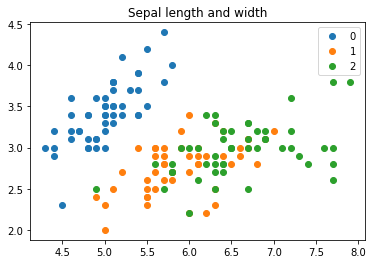

In [18]:
groups = df_iris.groupby("target")
for name, group in groups:
    plt.plot(group["sepal length (cm)"], group["sepal width (cm)"], marker="o", linestyle="", label=name)
plt.title("Sepal length and width")
plt.legend()

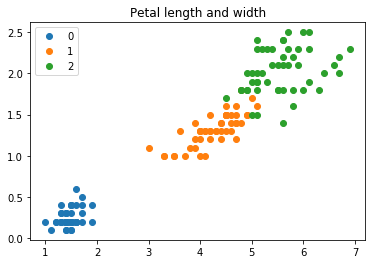

In [19]:
groups = df_iris.groupby("target")
for name, group in groups:
    plt.plot(group["petal length (cm)"], group["petal width (cm)"], marker="o", linestyle="", label=name)
plt.title("Petal length and width")
plt.legend()

### (2) Define target variable ($y$) and predictors ($X$) and split data into training and test data

In [36]:
y = df_iris.iloc[:,-1]
X = df_iris.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 112
Train sample (y): 112
Test sample (X): 38
Test sample (y): 38


### (3) Build your Naive Bayes Classifier using GaussianNB and print the train and test model accuracy

In [21]:
clf = GaussianNB().fit(X_train, y_train)
print ("Accuracy: ", clf.score(X_train, y_train))

Accuracy:  0.9464285714285714


### (3) What is species of iris with the follwoing features?
* Sepel length: 7.4 cm
* Sepal width: 3 cm
* Petal length: 6.2 cm
* Petal width: 2.2 cm

For species name,
* Target class 0: Setosa
* Target class 1: Versicolor
* Target class 2: Virginica

In [29]:
pred = clf.predict([[7.4, 3, 6.2, 2.2]])
                   
if pred == 0:
    print("Setosa")
elif pred == 1:
    print("Versicolor")
elif pred == 2: 
    print("Virginica")

Virginica


# 3. Develop Logistic Regression model to predict neighborhoods' 311 reporting behavior

Now you will use the dataset about 311 reporting behavior and socioeconomic characteristics. This dataset is aggregated at the Census Block Group (CBG) level and the followings are the description of the columns.

* target (y)    
    * Target class 1: Neighborhoods over-reporting local problems
    * Target class 0: Neighborhoods under-reporting local problems
* feamale_r: % of female population
* elederly_r: % of population older than 70
* black_r: % of black population
* non_eng_spanish_r: % of limited English speaker using Spanish
* non_eng_asian_5: % of limited English speaker using Asian languages
* hh_kid_r: % of housholds with kids under 18
* edu_high_r: % of population with at least Bachelor's degree
* unemployed_r: Unemployment rate
* med_rent: Median rent (USD)
* longercommute_r: % of commuters taking more than 45 minutes
* nonprofit_r: #of nonprofit organizaiton per 1000 people
* meanvt_rat: voter turn out

### (1) Load the following dataset.
    'NYC_CBG_311_reporting.csv'

In [50]:
df = pd.read_csv("../data/NYC_CBG_311_reporting.csv")
data = df[['female_r', 'elderly_r', 'black_r', 'non_eng_spanish_r', 'non_eng_asian_r', 'hh_kid_r', 'edu_high_r', 'unemployed_r', 'med_rent', 'longercommute_r', 'meanvt_rat', 'target']]
data.head()

,female_r,elderly_r,black_r,non_eng_spanish_r,non_eng_asian_r,hh_kid_r,edu_high_r,unemployed_r,med_rent,longercommute_r,meanvt_rat,target
0,0.474664,0.074786,0.421856,0.049038,0.0,0.610577,0.287162,0.064192,1224.0,0.692806,0.273543,0.0
1,0.578753,0.038874,0.441354,0.219207,0.0,0.703549,0.127370,0.075724,948.0,0.424552,0.220155,0.0
2,0.632696,0.273885,0.447983,0.138983,0.0,0.071186,0.179724,0.000000,629.0,0.563536,0.136675,1.0
3,0.513636,0.192857,0.253896,0.156812,0.0,0.874036,0.049645,0.014682,1150.0,0.290249,0.236928,0.0
4,0.450287,0.035373,0.100382,0.254438,0.0,1.068047,0.085217,0.013139,951.0,0.494432,0.128975,1.0


### (2) Define target variable (𝑦) and predictors (𝑋) and split data into training and test data

In [51]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 2098
Train sample (y): 2098
Test sample (X): 700
Test sample (y): 700


### (3) Build your Logistic Regression model and print a train model accuracy

In [53]:
model = LogisticRegression().fit(X_train, y_train)
print ("Accuracy:",round(model.score(X_train, y_train),3))

Accuracy: 0.749


### (4) Print confusion matrix, recall, precision, and specificity

In [55]:
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

[[969 257]
 [269 603]]
Accuracy: 0.7492850333651097
Recall: 0.6915137614678899
Precision: 0.7011627906976744
Specificity: 0.7903752039151712


### (5) Create ROC curve and state AUC

In [56]:
preds = y_prob[:,1]  
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)
print (roc_auc)

0.8044818309711601


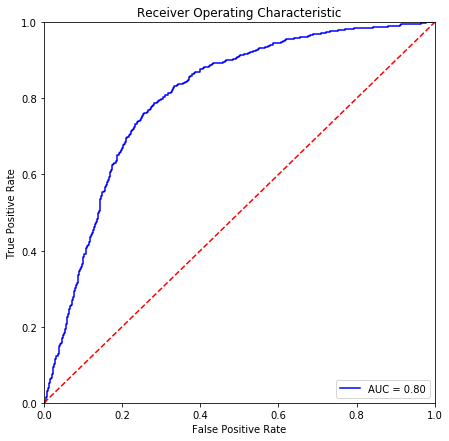

In [57]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### (6) Print train model coefficients and odds ratio. Then interprete about at least two interesting features with respect to 311 reporting behavior.

    Example: A neighborhood with more elderly population tends to under-report (XYZ%) about local problems through 311 system.

In [60]:
parameters = model.coef_
odds_ratio = np.exp(parameters)
para_results = pd.DataFrame()
para_results['feature'] = data.columns.tolist()[:-1]
para_results['coefficient'] = model.coef_[0]
para_results['odds_ratio'] = odds_ratio[0]
para_results

,feature,coefficient,odds_ratio
0,female_r,-0.085842,0.917739
1,elderly_r,-1.791877,0.166647
2,black_r,1.782066,5.942119
3,non_eng_spanish_r,2.475609,11.888943
4,non_eng_asian_r,-1.759994,0.172046
5,hh_kid_r,-0.159417,0.852641
6,edu_high_r,-2.852762,0.057685
7,unemployed_r,0.830573,2.294633
8,med_rent,0.000076,1.000076
9,longercommute_r,0.928890,2.531697


__Two interesting findings:__

1. Areas with lots of highly educated people (Bachelor's degree or higher) tend to highly underreport local problems through the 311 system by about 2.9%. 
2. By contrast, areas with high concentrations of people who speak Spanish as their primary language tend to overreport local problems by about 2.5%. 

### (7) Apply to the test data and compare results to the train model

In [61]:
y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

[[315  98]
 [ 90 197]]
Accuracy: 0.731
Recall: 0.686
Precision: 0.668
Specificity: 0.763
